## Chapter 2: End-to-End Machine Learning Project

###  How to obtain data nicely P44

In [7]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

### How to import data as pandas format P44

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

### Show Data Infos  P45

In [9]:
housing.head() # Data Structure

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info() # Numbers, Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts() # Check special "ocean_proximity"

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe() # check the statistic data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Using Matplotlib P47

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112464240>,
      dtype=object)

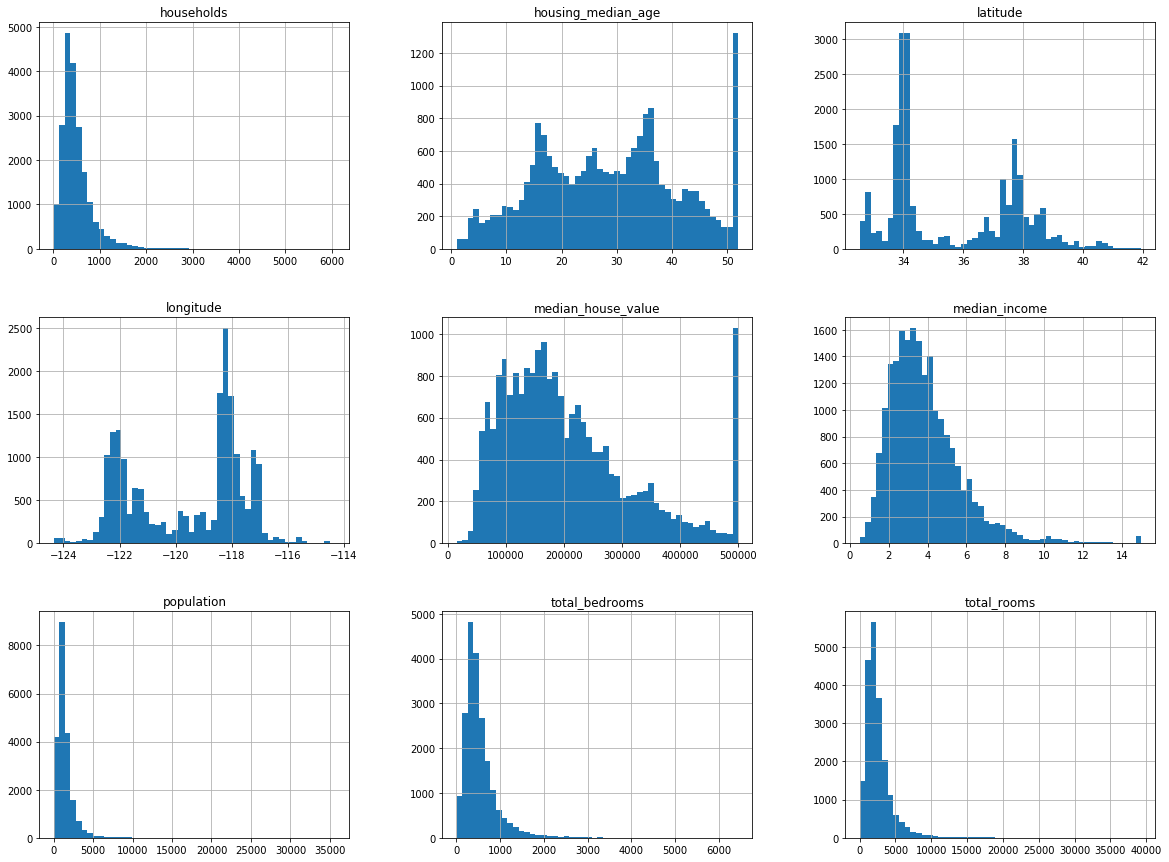

In [14]:
housing.hist(bins=50, figsize=(20,15)) # Plot all attributes

 - median_income does not look like it is expressed in US dollor, capped at 15
 - median_housing_value and housing_median_age are also capped. If we need precise preditions beyond 500000, it might be wrong.
 - attributes have very different scales, need feature scaling.
 - attribute are tail heavy, need transform them to more bell-shaped distributions.

### Create a Test Set P49

In [15]:
# Fix dataset
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    # Create Random Indices
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # iloc based on Line Number Indice
    return data.iloc[train_indices], data.iloc[test_indices] 

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set),"test")
    

16512 train + 4128 test


In [16]:
# Dynamic dataset, with updated dataset continuing adding
import hashlib

def test_set_check(identifier, test_ratio, hash):
    # np.int64(#) Long 8bits  -9223372036854775808 ~ 9223372036854775807
    # hashlib.md5 Arbitrary Long String to Fix Long String, Usually 
    # expressed in 128bits, 32 x Hex
    # hashlib.md5().hexdigest() '6a0ee9794ecadb3774ccb49b5283d3e5'
    # hashlib.md5().digest() b'j\x0e\xe9yN\xca\xdb7t\xcc\xb4\x9bR\x83\xd3\xe5'
    # hashlib.md5().digest()[-1] 0~255
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    # lambda anonymity function, lamdba argument: expression
    # apply(func [, args [, kwargs ]])
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

## IF we choose row index as ID
housing_with_id = housing.reset_index() # adds on `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

## However, it need to make sure new data gets appended to the end of the 
## dataset, and no row ever gets deleted. Therefore, we should use more stable 
## features to build a unique identifier
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [17]:
# Scikit way
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Create a stratified sampling P51

In [18]:
# Discover most median income values are clustered around 2 - 5
# Important to make each stratum have a sufficient number of instances
# otherwise, the estimate of stratum's importance may be biased
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

# Series.where(cond, other, inplace=True)
# If true remain its value, or replace it 
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# Stratified sampling 
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits means how many train/test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# split(X, y[, groups])	Generate indices to split data into training and test set.
# Stratification is done based on the y labels.
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing["income_cat"].value_counts() / len(housing)

# pd.drop() Drop specified labels from rows or columns.
# axis = 0 row, axis = 1 column
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

### Visualize Data P53

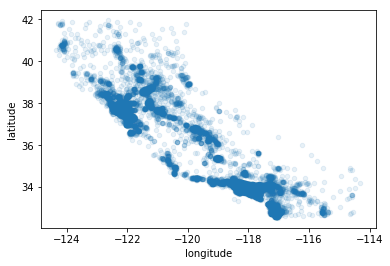

In [19]:
# Simply copy the train data
housing = strat_train_set.copy()

# Visualizing, the denser the lighter
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# Most data points near the Bay Area, Los Angels and San Diego, Central Valley

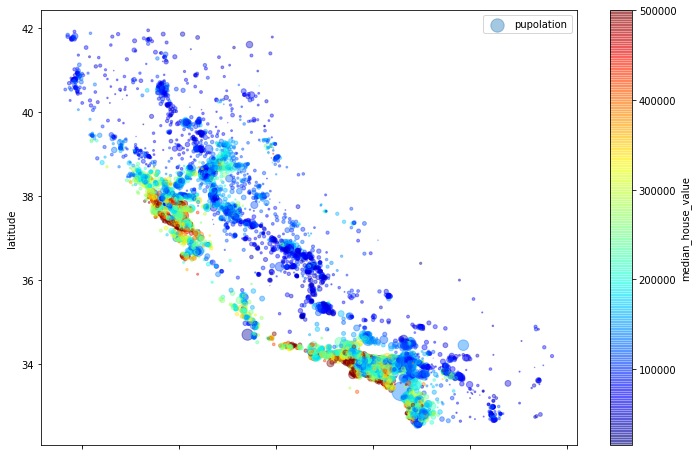

In [20]:
# Visualizing the population
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
    s=housing["population"]/100, label="pupolation",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(12,8))
plt.legend()

### Looking for Correlations P55

In [21]:
# Standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr()

# look how much each attribute correlates with median house value
# pd.sort_values
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2771cba8>,
      dtype=object)

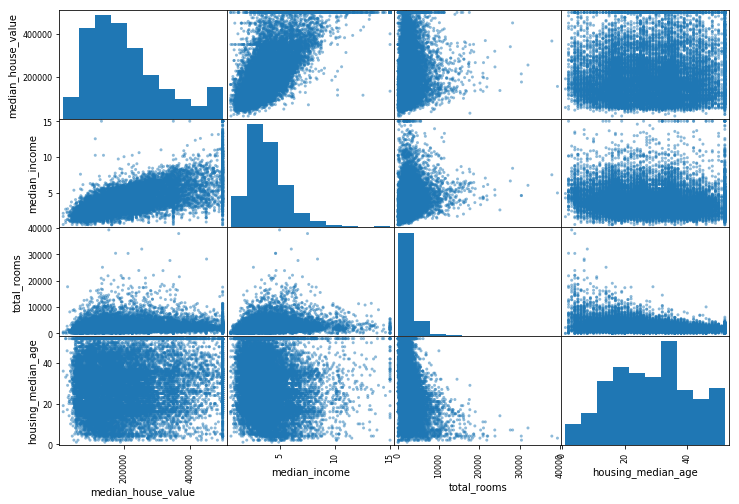

In [22]:
# Check wish plots Interesting attributes like 
# median_house_value, median_income, total_rooms, housing_median_age
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

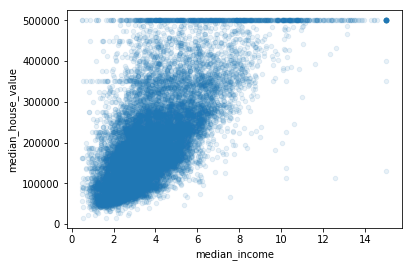

In [23]:
# zoom in to see the correlation plot between median_house_value and median_income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# 

### Prepare the Data for Machine Learning Algorithms

In [24]:
### Separate the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [25]:
# Most ML Algorithms cannot work well will missing features
# option 1: Get rid of the corresponding districts
housing.dropna(subset=["total_bedrooms"])

# option 2: Get rid of the whole attribute
housing.drop("total_bedrooms", axis=1)

# option 3: Set the value to some value (zero, mean, median)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### Handling Numerical Attributes

In [26]:
# Scikit Way
from sklearn.preprocessing import Imputer

# Create an estimator (Imputer) with hyperparameter (strategy)
imputer = Imputer(strategy="median")

# Median can only be appliedid to numberical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the data
imputer.fit(housing_num)

# Inspection the estimator
imputer.strategy
imputer.statistics_
# array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    
# , 1164.    , 408.    ,    3.5409])
    
# Transform to dataset
X = imputer.transform(housing_num)

# Result is plain Numpy array, back into Pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

#### Handling Text and Catrgorical Attributes

In [27]:
# Get the text attributes
housing_cat = housing["ocean_proximity"]

In [28]:
# Encoder to numbers
# However it should mean 0 - 1 should be more closer than 0 - 2
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [29]:
# one-hot encoding, catrgory 1 or 0
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [30]:
# Simply Way
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### Custom Transformers

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

# total_rooms 3, total_bedrooms 4, population 5, houshold 6
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# BaseException means no *args or **kargs
# *args means variable anonymous parameters, tuple
# *kargs means variable dict parameters, dict  
# TransformerMixin means automate apply fit_transform method
# np.c_(), pd.merge(), equal rows
# np.r_(). pd.concat(), equal columns
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_houshold = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_houshold, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_houshold, population_per_household]

    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# input a np array values
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

In [32]:
# Two common ways

# min-max scaling (normalization)
# Subtract the min value and divide by the max minus the min
from sklearn.preprocessing import MinMaxScaler

# standardization scaling
# subtract mean value and divide by the variance
from sklearn.preprocessing import StandardScaler

### Transformation Pipelines

In [34]:
# Select Feature Transformer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


# Pipeline for numerical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# LabelBinarizer Version Problem
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self
    def transform(self, X):
        return self.encoder.transform(X)

# Pipeling for category features

cat_attribs = ['ocean_proximity']

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

# Pipeling for Feature Union
# FeatureUnion will call each in parallel, but waits for output
# and then concatenates them and returns the result
# from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Select and Train a Model

#### Training and Evaluating

In [35]:
# Linear Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

# Evaluate

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
# 68628 badly underfit

In [36]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
# 0.0 badly overfit

In [37]:
# Better Evaluation Using Cross-Validation
# K-fold cross-validation, utility function rather than cost function
# scoring choose "neg_mean_squared_error"

from sklearn.model_selection import  cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
        scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [69316.02634772 65498.84994772 71404.25935862 69098.46240168
 70580.30735263 75540.88413124 69717.93143674 70428.42648461
 75888.17618283 68976.12268448]
Mean: 70644.94463282847
Standard deviation: 2938.9378926251234


In [38]:
# Radndom Forests (Ensemble Learning)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
        scoring="neg_mean_squared_error", cv=10)

forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores: [52869.23106834 49189.93801195 51726.73647871 54995.98190463
 50979.93079904 55978.43765914 52283.7609046  51001.92227546
 54447.35786983 53389.94422283]
Mean: 52686.32411945208
Standard deviation: 1971.265477949874


### Save Model

In [39]:
from sklearn.externals import joblib

joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')
joblib.dump(forest_reg, 'forest_reg.pkl')

forest2_reg = joblib.load('forest_reg.pkl')
forest2_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Fine-Tune Model

In [40]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [42]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [43]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64583.23831343775 {'max_features': 2, 'n_estimators': 3}
55576.873722117016 {'max_features': 2, 'n_estimators': 10}
52956.30662941401 {'max_features': 2, 'n_estimators': 30}
60717.61577683773 {'max_features': 4, 'n_estimators': 3}
52634.105267438536 {'max_features': 4, 'n_estimators': 10}
50528.74511007911 {'max_features': 4, 'n_estimators': 30}
58493.21467912166 {'max_features': 6, 'n_estimators': 3}
52208.348666826736 {'max_features': 6, 'n_estimators': 10}
49924.88903176482 {'max_features': 6, 'n_estimators': 30}
58650.6191468369 {'max_features': 8, 'n_estimators': 3}
52369.18784516499 {'max_features': 8, 'n_estimators': 10}
50109.84568776333 {'max_features': 8, 'n_estimators': 30}
62470.342102357106 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54496.78629093729 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60353.800853111454 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52397.67552164831 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [44]:
# Analyze the Best Models and Their Errors
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69687766e-02, 7.04319887e-02, 4.38660619e-02, 1.80630448e-02,
       1.66508742e-02, 1.79482850e-02, 1.59942989e-02, 3.27548930e-01,
       5.57736006e-02, 1.05319561e-01, 9.13965806e-02, 1.16638033e-02,
       1.38350194e-01, 1.03976446e-04, 3.83940095e-03, 6.08062375e-03])

In [45]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Find the most importance features
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32754893001195934, 'median_income'),
 (0.13835019350471953, 'INLAND'),
 (0.10531956070724346, 'pop_per_hhold'),
 (0.09139658055040592, 'bedrooms_per_room'),
 (0.07696877663966344, 'longitude'),
 (0.07043198869339834, 'latitude'),
 (0.05577360056115168, 'rooms_per_hhold'),
 (0.04386606192454317, 'housing_median_age'),
 (0.018063044805051474, 'total_rooms'),
 (0.01794828495917463, 'population'),
 (0.016650874220719983, 'total_bedrooms'),
 (0.01599429894210943, 'households'),
 (0.01166380333543238, '<1H OCEAN'),
 (0.006080623745976418, 'NEAR OCEAN'),
 (0.0038394009525752966, 'NEAR BAY'),
 (0.00010397644587548846, 'ISLAND')]

### Evaluate on the Test Set

In [46]:
# best model
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47547.54607409892

## Exercises

In [47]:
# Exercise 1
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
#grid_search.fit(housing_prepared, housing_labels)

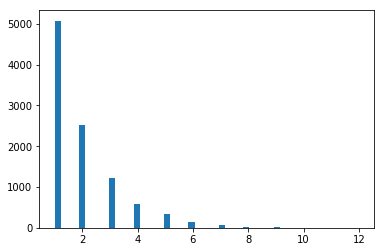

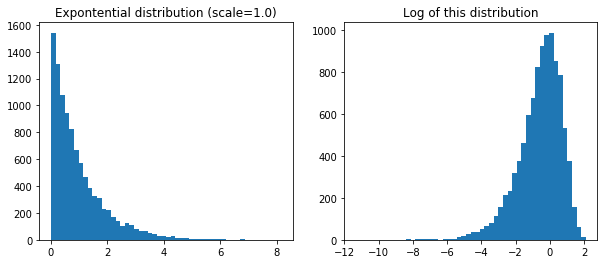

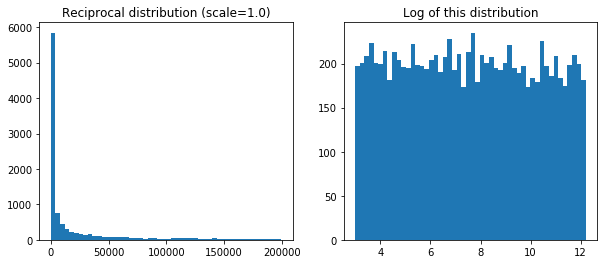

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=265.8583788632432, gamma=3.010121430917521, kernel=linear .....
[CV] C=265.8583788632432, gamma=3.010121430917521, kernel=linear .....
[CV] C=265.8583788632432, gamma=3.010121430917521, kernel=linear .....
[CV] C=265.8583788632432, gamma=3.010121430917521, kernel=linear .....
[CV]  C=265.8583788632432, gamma=3.010121430917521, kernel=linear, total=   8.1s
[CV]  C=265.8583788632432, gamma=3.010121430917521, kernel=linear, total=   8.1s
[CV] C=265.8583788632432, gamma=3.010121430917521, kernel=linear .....
[CV] C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf .......
[CV]  C=265.8583788632432, gamma=3.010121430917521, kernel=linear, total=   8.2s
[CV] C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf .......
[CV]  C=265.8583788632432, gamma=3.010121430917521, kernel=linear, total=   8.3s
[CV] C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf .......
[CV]  C=265.8583788632432, gamma=3.01012143091

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.1min


[CV]  C=70.99757664393003, gamma=0.3627537294604771, kernel=rbf, total=  10.1s
[CV] C=21.000465008462697, gamma=0.023332523598323388, kernel=linear .
[CV]  C=70.99757664393003, gamma=0.3627537294604771, kernel=rbf, total=  10.4s
[CV] C=21.000465008462697, gamma=0.023332523598323388, kernel=linear .
[CV]  C=21.000465008462697, gamma=0.023332523598323388, kernel=linear, total=   7.4s
[CV] C=1369.584019114956, gamma=0.15023452872733867, kernel=rbf ......
[CV]  C=21.000465008462697, gamma=0.023332523598323388, kernel=linear, total=   7.5s
[CV] C=1369.584019114956, gamma=0.15023452872733867, kernel=rbf ......
[CV]  C=21.000465008462697, gamma=0.023332523598323388, kernel=linear, total=   7.5s
[CV] C=1369.584019114956, gamma=0.15023452872733867, kernel=rbf ......
[CV]  C=21.000465008462697, gamma=0.023332523598323388, kernel=linear, total=   7.5s
[CV] C=1369.584019114956, gamma=0.15023452872733867, kernel=rbf ......
[CV]  C=1369.584019114956, gamma=0.15023452872733867, kernel=rbf, total=   9

[CV]  C=66.24055402931889, gamma=0.4960365360493639, kernel=rbf, total=  10.3s
[CV] C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf .....
[CV]  C=66.24055402931889, gamma=0.4960365360493639, kernel=rbf, total=   9.9s
[CV] C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf .....
[CV]  C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf, total=   9.7s
[CV] C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf .....
[CV]  C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf, total=   9.6s
[CV] C=84.11142374014415, gamma=0.838636245624803, kernel=linear .....
[CV]  C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf, total=   9.5s
[CV] C=84.11142374014415, gamma=0.838636245624803, kernel=linear .....
[CV]  C=84.11142374014415, gamma=0.838636245624803, kernel=linear, total=   6.7s
[CV]  C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf, total=   9.5s
[CV] C=84.11142374014415, gamma=0.838636245624803, kernel=linear .....
[CV] C=84.1

[CV] C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf ......
[CV] C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf ......
[CV]  C=4147.289035581005, gamma=0.22153944050588595, kernel=rbf, total=   9.4s
[CV] C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf ......
[CV]  C=4147.289035581005, gamma=0.22153944050588595, kernel=rbf, total=   9.5s
[CV] C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf ......
[CV]  C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf, total=  10.0s
[CV] C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf ......
[CV]  C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf, total=  10.0s
[CV] C=3076.461608055798, gamma=1.4752145260435134, kernel=linear ....
[CV]  C=22.04293722310332, gamma=0.22169760231351215, kernel=rbf, total=  10.0s
[CV] C=3076.461608055798, gamma=1.4752145260435134, kernel=linear ....
[CV]  C=3076.461608055798, gamma=1.4752145260435134, kernel=linear, total=   7.6s
[CV] C=3076.461608055

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.7min


[CV]  C=3076.461608055798, gamma=1.4752145260435134, kernel=linear, total=   7.9s
[CV] C=12020.779509547774, gamma=1.052904084582266, kernel=rbf .......
[CV]  C=12020.779509547774, gamma=1.052904084582266, kernel=rbf, total=  10.6s
[CV] C=12020.779509547774, gamma=1.052904084582266, kernel=rbf .......
[CV]  C=12020.779509547774, gamma=1.052904084582266, kernel=rbf, total=  10.6s
[CV] C=7768.555509406282, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=12020.779509547774, gamma=1.052904084582266, kernel=rbf, total=  10.4s
[CV] C=7768.555509406282, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=12020.779509547774, gamma=1.052904084582266, kernel=rbf, total=  10.3s
[CV] C=7768.555509406282, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=12020.779509547774, gamma=1.052904084582266, kernel=rbf, total=  10.2s
[CV] C=7768.555509406282, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=7768.555509406282, gamma=0.9763011917123741, kernel=rbf, total=   9.8s
[CV] C=7768.555509

[CV] C=111.9197375601216, gamma=0.5282819748826726, kernel=linear ....
[CV]  C=979.1668719110207, gamma=1.1891370222133257, kernel=linear, total=   7.5s
[CV] C=111.9197375601216, gamma=0.5282819748826726, kernel=linear ....
[CV]  C=111.9197375601216, gamma=0.5282819748826726, kernel=linear, total=   7.2s
[CV] C=111.9197375601216, gamma=0.5282819748826726, kernel=linear ....
[CV]  C=111.9197375601216, gamma=0.5282819748826726, kernel=linear, total=   7.1s
[CV] C=81.32305215236218, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=111.9197375601216, gamma=0.5282819748826726, kernel=linear, total=   7.3s
[CV] C=81.32305215236218, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=111.9197375601216, gamma=0.5282819748826726, kernel=linear, total=   7.2s
[CV] C=81.32305215236218, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=111.9197375601216, gamma=0.5282819748826726, kernel=linear, total=   7.0s
[CV] C=81.32305215236218, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=81.

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 13.9min finished


{'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [58]:
# Exercise 2
from scipy.stats import geom, expon, reciprocal

# geom: Geometric distribution
# Consider p successful probility, k trials, 
# unti 1 success distribution
# p(X=k) ~ (1-p)**(k-1) * p
# geom(p).rvs() generate random to simulate
geom_distrib = geom(0.5).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()

# expon: exponential distribution
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Expontential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

# reciprocal
# f(x,a,b) = 1/(xlog(b/a))
reciprocal_distrib = reciprocal(20,200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

# Randomize GridSearch
from sklearn.model_selection import RandomizedSearchCV
param_distrib = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 20000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distrib,
    n_iter=50, cv=5, scoring="neg_mean_squared_error",
    verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
rnd_mse = rnd_search.best_score_
rnd_rmse = np.sqrt(-rnd_mse)
rnd_search.best_params_

In [55]:
# Exercise 3
from sklearn.base import BaseEstimator, TransformerMixin

# np.argpartition(arr, -k) find the k largest
# however, no sort, therefore add a np.sort
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_importances = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_importances]
    
# Create a Pipeline
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5))
])

housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

housing_prepared_top_k_features[0:3]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

In [ ]:
# Exercise 4
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5)),
    ('svg_reg', SVR(**rnd_search.best_params_))
])